In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

from scipy import stats
from scipy.optimize import curve_fit


In [2]:
# number of plants
N = 100
# simulate initial heights
h0 = np.random.normal(10, 2, N)
# assign treatments and simulate fungus and growth
treatment = np.repeat([0, 1], N / 2)
fungus = np.random.binomial(n=1, p=0.5 - treatment * 0.4, size=N)
h1 = h0 + np.random.normal(5 - 3 * fungus, size=N)
# compose a clean data frame
d = pd.DataFrame.from_dict({"h0": h0, "h1": h1, "treatment": treatment, "fungus": fungus})

with pm.Model() as m_6_6:
    p = pm.Lognormal("p", 0, 0.25)

    mu = pm.Deterministic("mu", p * d.h0)
    sigma = pm.Exponential("sigma", 1)

    h1 = pm.Normal("h1", mu=mu, sigma=sigma, observed=d.h1)

    m_6_6_trace = pm.sample(return_inferencedata=True)

with pm.Model() as m_6_7:
    a = pm.Normal("a", 0, 0.2)
    bt = pm.Normal("bt", 0, 0.5)
    bf = pm.Normal("bf", 0, 0.5)

    p = a + bt * d.treatment + bf * d.fungus

    mu = pm.Deterministic("mu", p * d.h0)
    sigma = pm.Exponential("sigma", 1)

    h1 = pm.Normal("h1", mu=mu, sigma=sigma, observed=d.h1)

    m_6_7_trace = pm.sample(return_inferencedata=True)

with pm.Model() as m_6_8:
    a = pm.Normal("a", 0, 0.2)
    bt = pm.Normal("bt", 0, 0.5)

    p = a + bt * d.treatment

    mu = pm.Deterministic("mu", p * d.h0)
    sigma = pm.Exponential("sigma", 1)

    h1 = pm.Normal("h1", mu=mu, sigma=sigma, observed=d.h1)

    m_6_8_trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bf, bt, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 27 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bt, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 36 seconds.


In [6]:
compare_df = az.compare(
    {
        "m_6_6": m_6_6_trace,
        "m_6_7": m_6_7_trace,
        "m_6_8": m_6_8_trace,
    },
    method="pseudo-BMA",
    ic="waic",
    scale="deviance",
)
compare_df

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:144: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m_6_7,0,328.863,3.58004,0,1,12.2134,0,False,deviance
m_6_8,1,379.252,2.5758,50.389,1.14334e-11,11.7632,11.109,False,deviance
m_6_6,2,398.097,1.59985,69.2342,9.24679e-16,11.8967,13.6217,False,deviance


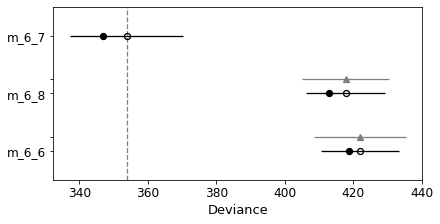

In [16]:

az.plot_compare(compare_df);



<h2>Outliers<h2>

In [3]:
d = pd.read_csv("Data/WaffleDivorce.csv", delimiter=";")

d["A"] = stats.zscore(d["MedianAgeMarriage"])#Returns #R  zscorearray_like
    # The z-scores, standardized by mean and standard deviation of input array a.


d["D"] = stats.zscore(d["Divorce"])
d["M"] = stats.zscore(d["Marriage"])

In [4]:
with pm.Model() as m_5_1:
    a = pm.Normal("a", 0, 0.2)
    bA = pm.Normal("bA", 0, 0.5)

    mu = a + bA * d["A"]
    sigma = pm.Exponential("sigma", 1)

    D = pm.Normal("D", mu, sigma, observed=d["D"])

    m_5_1_trace = pm.sample(return_inferencedata=True)

with pm.Model() as m_5_2:
    a = pm.Normal("a", 0, 0.2)
    bM = pm.Normal("bM", 0, 0.5)

    mu = a + bM * d["M"]
    sigma = pm.Exponential("sigma", 1)

    D = pm.Normal("D", mu, sigma, observed=d["D"])

    m_5_2_trace = pm.sample(return_inferencedata=True)

with pm.Model() as m_5_3:
    a = pm.Normal("a", 0, 0.2)
    bA = pm.Normal("bA", 0, 0.5)
    bM = pm.Normal("bM", 0, 0.5)

    mu = a + bA * d["A"] + bM * d["M"]
    sigma = pm.Exponential("sigma", 1)

    D = pm.Normal("D", mu, sigma, observed=d["D"])

    m_5_3_trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bA, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 33 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bM, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bM, bA, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 23 seconds.


In [5]:
az.compare(
    {"m_5_1": m_5_1_trace, "m_5_2": m_5_2_trace, "m_5_3": m_5_3_trace},
    scale="deviance",
)

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:144: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:686: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:686: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust mod

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
m_5_1,0,126.614,3.55908,0,0.896834,12.7484,0,True,deviance
m_5_3,1,128.749,4.81127,2.13518,0,12.8749,0.760833,True,deviance
m_5_2,2,140.334,2.94728,13.7201,0.103166,9.77833,9.2111,False,deviance


 First note that the model that omits marriage
rate, m5.1, lands on top. 
This is because marriage rate has very little association with
the outcome.
So the model that omits it has slightly better expected out-of-sample performance,
even though it actually fits the sample slightly worse than m5.3, the model with both
predictors. The difference between the top two models is only 1.9, with a standard error of
0.8, so the models make very similar predictions. This is the typical pattern, whenever some
predictor has a very small association with the outcome


Recall from the section on PSIS that when a point’s Pareto k value is above 0.5, the importance
weight can be unreliable. 
Furthermore, these points tend to be outliers with unlikely
values, according to the model.
As a result, they are highly influential and make it difficult
to estimate out-of-sample predictive accuracy. 
Why? Because any new sample is unlikely to
contain these same outliers, and since these outliers were highly influential, they could make
out-of-sample predictions worse than expected. 
WAIC is vulnerable to outliers as well. It
doesn’t have an automatic warning. But it does have a way to measure this risk, through the
estimate of the overfitting penalty.
Let’s look at the individual States, to see which are causing the problem

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:1454: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


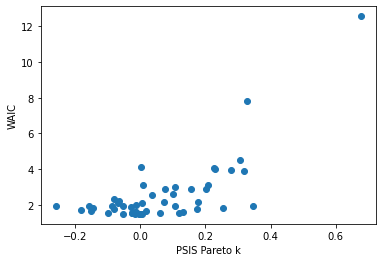

In [6]:
psis_m_5_3 = az.loo(m_5_3_trace, pointwise=True, scale="deviance")
waic_m_5_3 = az.waic(m_5_3_trace, pointwise=True, scale="deviance")

# Figure 7.10
plt.scatter(psis_m_5_3.pareto_k, waic_m_5_3.waic_i)
plt.xlabel("PSIS Pareto k")
plt.ylabel("WAIC");

Individual points are individual States, with Pareto k on the horizontal axis and WAIC’s penalty term. The State of Idaho (ID, upper-right corner) has both a very high Pareto k value (above 1) and a large pentalty term (over 2). As you saw
back in Chapter 5, Idaho has a very low divorce rate for its age at marriage. As a result, it
is highly influential—it exerts more influence on the posterior distribution than other States
do.
The Pareto k value is double the theoretical point at which the variance becomes infinite
(k=0.5). Likewise, WAIC assigns Idaho a penalty over 2. This penalty
term is sometimes called the “effective number of parameters,” because in ordinary linear
regressions the sum of all penalty terms from all points tends to be equal to the number of
free parameters in the model. 
But in this case there are 4 parameters and the total penalty is
closer to 6—check WAIC(m5.3).
The outlier Idaho is causing this additional overfitting risk.
What can be done about this? There is a tradition of dropping outliers. People sometimes drop outliers even before a model is fit, based only on standard deviations from the mean outcome value. You should never do that—a point can only be unexpected and highly
influential in light of a model.After you fit a model, the picture changes. 
If there are only a few outliers, and you are sure to report results both with and without them, dropping outliers
might be okay. 
But if there are several outliers and we really need to model them, what then? A basic problem here is that the Gaussian error model is easily surprised. Gaussian distributions  have very thin tails. 
This means that very little probability mass is given to observations far from the mean. Many natural phenomena
do have very thin tails like this. Human height is a good example. But many phenomena do not. 
Instead many phenomena have thicker tails with rare, extreme observations. These are
not measurement errors, but real events containing information about natural process.


One way to both use these extreme observations and reduce their influence is to employ
some kind of robust regression. A “robust regression” can mean many different things,
but usually it indicates a linear model in which the influence of extreme observations is reduced.

A common and useful kind of robust regression is to replace the Gaussian model. The Student-t distribution arises from a mixture
of Gaussian distributions with different variances. If the variances are diverse, then the tails can be quite thick.
The generalized Student-t distribution has the same mean μ and scale σ parameters as the Gaussian, but it also has an extra shape parameter ν that controls how thick the tails are.
When ν is large, the tails are thin, converging in the limit ν = ∞ to a Gaussian distribution.
But as ν approaches 1, the tails get thicker and rare extreme observations occur more often. 




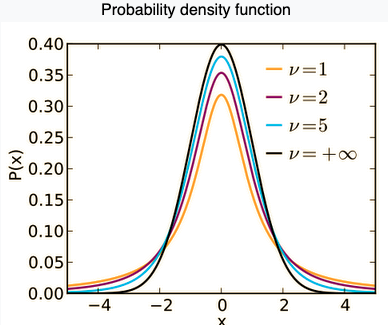

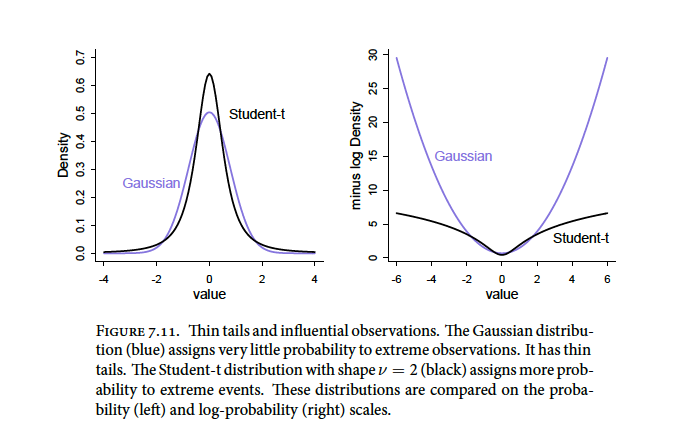

Figure 7.11 compares
a Gaussian distribution (in blue) to a corresponding Student-t distribution (in black) with
ν = 2. The Student-t distribution has thicker tails, and this is most obvious on the log
scale (right), where the Gaussian tails shrink quadratically—a normal distribution is just an
exponentiated parabola remember—while the Student-t tails shrink much more slowly.


If you have a very large data set with such events, you could estimate ν. 
Financial time series, taken over very long periods, are one example. But when using robust regression, we
don’t usually try to estimate ν, because there aren’t enough extreme observations to do so.
Instead we assume ν is small (thick tails) in order to reduce the influence of outliers. 

Let’s re-estimate the divorce model using a Student-t distribution with ν = 2. 


In [7]:
with pm.Model() as m_5_3t:
    a = pm.Normal("a", 0, 0.2)
    bA = pm.Normal("bA", 0, 0.5)
    bM = pm.Normal("bM", 0, 0.5)

    mu = a + bA * d["A"] + bM * d["M"]
    sigma = pm.Exponential("sigma", 1)

    D = pm.StudentT("D", 2, mu, sigma, observed=d["D"])

    m_5_3t_trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bM, bA, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 41 seconds.


In [8]:
az.compare(
    {"m_5_1": m_5_1_trace, "m_5_2": m_5_2_trace, "m_5_3": m_5_3_trace,"m_5_3t":m_5_3t_trace},
    scale="deviance",
)


/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:144: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:686: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:686: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust mod

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
m_5_1,0,126.614,3.55908,0,0.896835,12.7484,0,True,deviance
m_5_3,1,128.749,4.81127,2.13518,0,12.8749,0.760833,True,deviance
m_5_3t,2,132.722,5.06232,6.10792,0,10.6558,5.63603,False,deviance
m_5_2,3,140.334,2.94728,13.7201,0.103165,9.77833,9.2111,False,deviance


In [9]:


az.loo(m_5_3_trace, pointwise=True, scale="deviance")



/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:686: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 2000 by 50 log-likelihood matrix

             Estimate       SE
deviance_loo   128.75    12.87
p_loo            4.81        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       48   96.0%
 (0.5, 0.7]   (ok)          1    2.0%
   (0.7, 1]   (bad)         1    2.0%
   (1, Inf)   (very bad)    0    0.0%

In [10]:


az.loo(m_5_3t_trace, pointwise=True, scale="deviance")



Computed from 2000 by 50 log-likelihood matrix

             Estimate       SE
deviance_loo   133.10    10.67
p_loo            5.21        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       50  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

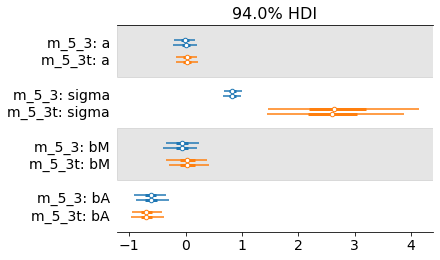

In [10]:


az.plot_forest([m_5_3_trace, m_5_3t_trace], model_names=["m_5_3", "m_5_3t"], figsize=[6, 3.5]);



How does this impact the
posterior distribution of the association between age at marriage and divorce? If you compare
models m5.3t and m5.3, you’ll see that the coefficient bA has gotten farther from zero
when we introduce the Student-t distribution. 
This is because Idaho has a low divorce rate
and a low median age at marriage. When it was influential, it reduced the association between
age at marriage and divorce.
Now it is less influential, so the association is estimate to
be slightly larger.